<a href="https://colab.research.google.com/github/ttadesusi/Artificial-Intelligence-Projects/blob/main/Customer_Loyalty_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CUSTOMER LOYALTY SCORE PREDICTION**

---

## **Using Different Classifier Algorithms:**

**1.   Polynomial Regression**

**2.   Random Forest**

**3.   K-Nearest Neigbour**

**4.   Random Forest**

**5.   Artificial Neural Network**


## **DATA AQUISITION**

In [1]:
# import dataframe and numpy package
import pandas as pd
import numpy as np

In [2]:
# read data from source
data_link  = "https://drive.google.com/uc?id=1kbIMjC1NrLece-igYu8HMBkTgWTHGHie"
df = pd.read_csv(data_link) 
df.head()

,Age,Income,Num_Purchases,Average_Rating,Customer_Service_Rating,Membership_Duration,Loyalty
0,63,4528,1,1,2,5,Loyal
1,20,2482,14,1,5,3,Loyal
2,46,1316,1,4,4,3,Loyal
3,52,3024,4,4,2,4,Non-Loyal
4,56,3327,18,4,4,8,Loyal


## **DATA DESCRIPTION**

In [3]:
# summary statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,41.624,13.500922,18.0,31.0,42.0,53.00,64.0
Income,1000.0,2931.553,1218.241599,802.0,1951.0,2904.5,4006.25,4998.0
Num_Purchases,1000.0,10.238,5.481186,1.0,5.0,11.0,15.00,19.0
Average_Rating,1000.0,2.999,1.408184,1.0,2.0,3.0,4.00,5.0
Customer_Service_Rating,1000.0,2.978,1.397666,1.0,2.0,3.0,4.00,5.0
Membership_Duration,1000.0,4.917,2.554337,1.0,3.0,5.0,7.00,9.0


In [4]:
# data info
print(df.info(), "\n")  # display attributes (column) data type and number of non-empty cells
print("Number of rows (observations) is", df.shape[0], "and", "Number of columns (attributes) is" , df.shape[1])  # Number of rows and column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Income                   1000 non-null   int64 
 2   Num_Purchases            1000 non-null   int64 
 3   Average_Rating           1000 non-null   int64 
 4   Customer_Service_Rating  1000 non-null   int64 
 5   Membership_Duration      1000 non-null   int64 
 6   Loyalty                  1000 non-null   object
dtypes: int64(6), object(1)
memory usage: 54.8+ KB
None 

Number of rows (observations) is 1000 and Number of columns (attributes) is 7


## **DATA DISTRIBUTION**

In [5]:
# Features and Target
features = df.drop(['Loyalty'], axis=1)
target = df['Loyalty']

In [6]:
# Skewness and Kurtosis
print('data skewness:\n',features.skew(),'\n')
print('data kurtosis:\n',features.kurtosis())

data skewness:
 Age                       -0.058771
Income                    -0.014204
Num_Purchases             -0.080040
Average_Rating            -0.019776
Customer_Service_Rating    0.026013
Membership_Duration        0.035302
dtype: float64 

data kurtosis:
 Age                       -1.154897
Income                    -1.162805
Num_Purchases             -1.186772
Average_Rating            -1.290931
Customer_Service_Rating   -1.277736
Membership_Duration       -1.180792
dtype: float64


<Axes: >

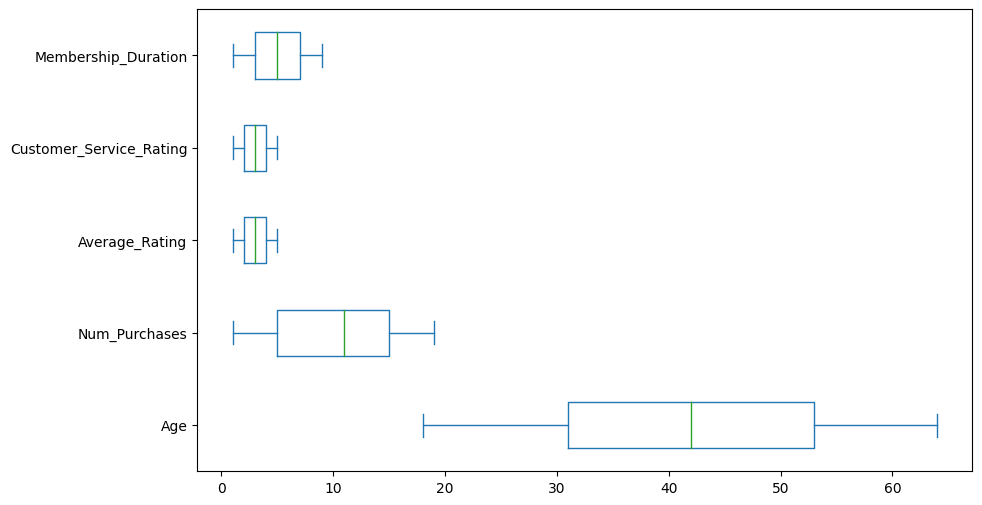

In [7]:
# Visualize data distribution

features.drop(['Income'], axis =1).plot.box(figsize=(10,6), vert = False, grid = False)

<Axes: >

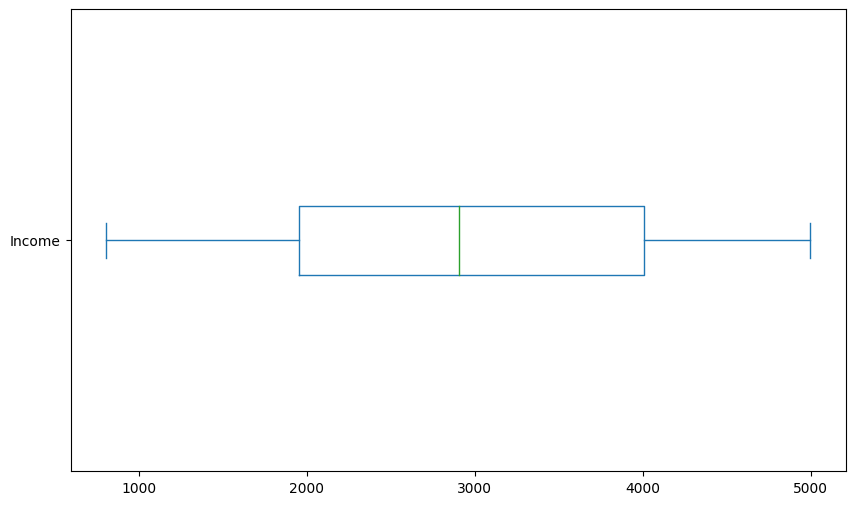

In [8]:
# Visualize data distribution

features['Income'].plot.box(figsize=(10,6), vert = False, grid = False)

## **CORRELATION ANALYSIS**

In [9]:
# Import package for Onehot Encoding
from sklearn.preprocessing import LabelEncoder

encoded_df = df.copy()

In [10]:
# display the data values for categorical column
for col in encoded_df.select_dtypes(include='object').columns:
    print(f"{col}:\n{encoded_df[col].value_counts()}\n")

Loyalty:
Non-Loyal    521
Loyal        479
Name: Loyalty, dtype: int64



In [11]:
# Encode loyalty categorical column to binary values

le_loyalty = LabelEncoder()
le_loyalty.fit(['Non-Loyal','Loyal'])
encoded_df['Loyalty'] = le_loyalty.transform(df['Loyalty']) 

encoded_df.head()

,Age,Income,Num_Purchases,Average_Rating,Customer_Service_Rating,Membership_Duration,Loyalty
0,63,4528,1,1,2,5,0
1,20,2482,14,1,5,3,0
2,46,1316,1,4,4,3,0
3,52,3024,4,4,2,4,1
4,56,3327,18,4,4,8,0


In [12]:
# pearson correlation between dependent variables and dependent variable
encoded_df.corr(method='pearson')

,Age,Income,Num_Purchases,Average_Rating,Customer_Service_Rating,Membership_Duration,Loyalty
Age,1.000000,-0.003990,-0.029022,0.085328,-0.023833,-0.017654,0.006215
Income,-0.003990,1.000000,-0.017587,0.024517,-0.011829,-0.005222,0.000823
Num_Purchases,-0.029022,-0.017587,1.000000,-0.060663,-0.026494,-0.009598,0.029232
Average_Rating,0.085328,0.024517,-0.060663,1.000000,0.005075,0.008326,0.033452
Customer_Service_Rating,-0.023833,-0.011829,-0.026494,0.005075,1.000000,0.039863,-0.020832
Membership_Duration,-0.017654,-0.005222,-0.009598,0.008326,0.039863,1.000000,-0.011570
Loyalty,0.006215,0.000823,0.029232,0.033452,-0.020832,-0.011570,1.000000


In [13]:
# spearman correlation between dependent variables and dependent variable
encoded_df.corr(method='spearman')

,Age,Income,Num_Purchases,Average_Rating,Customer_Service_Rating,Membership_Duration,Loyalty
Age,1.000000,-0.002097,-0.030469,0.087123,-0.021735,-0.017125,0.006818
Income,-0.002097,1.000000,-0.017944,0.025549,-0.011769,-0.005357,0.000978
Num_Purchases,-0.030469,-0.017944,1.000000,-0.059932,-0.025415,-0.012478,0.029475
Average_Rating,0.087123,0.025549,-0.059932,1.000000,0.005678,0.008239,0.033153
Customer_Service_Rating,-0.021735,-0.011769,-0.025415,0.005678,1.000000,0.038841,-0.021043
Membership_Duration,-0.017125,-0.005357,-0.012478,0.008239,0.038841,1.000000,-0.011588
Loyalty,0.006818,0.000978,0.029475,0.033153,-0.021043,-0.011588,1.000000


In [14]:
# kendall tau correlation between dependent variables and dependent variable
encoded_df.corr(method='kendall')

,Age,Income,Num_Purchases,Average_Rating,Customer_Service_Rating,Membership_Duration,Loyalty
Age,1.000000,-0.001656,-0.020948,0.064497,-0.015593,-0.011995,0.005628
Income,-0.001656,1.000000,-0.011977,0.018863,-0.008768,-0.003425,0.000799
Num_Purchases,-0.020948,-0.011977,1.000000,-0.044732,-0.019171,-0.008916,0.024699
Average_Rating,0.064497,0.018863,-0.044732,1.000000,0.005202,0.006445,0.029655
Customer_Service_Rating,-0.015593,-0.008768,-0.019171,0.005202,1.000000,0.029146,-0.018823
Membership_Duration,-0.011995,-0.003425,-0.008916,0.006445,0.029146,1.000000,-0.009976
Loyalty,0.005628,0.000799,0.024699,0.029655,-0.018823,-0.009976,1.000000


## **FEATURES SELECTION AND DATA STANDARDIZATION**

In [15]:
# Importing split package
from sklearn.model_selection import train_test_split  

### **Features(X) and Target(y) Selection**

In [16]:
# select X and y and standardize X
X = encoded_df.drop(['Loyalty'], axis=1)
y = encoded_df['Loyalty']

### **Data Split**

In [17]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)  

print("Number of X train samples:",X_train.shape[0], "and number of X test samples :", X_test.shape[0])

Number of X train samples: 800 and number of X test samples : 200


### **Data Stardardization**

In [18]:
# import data scaling package
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [19]:
scaled_X_train = scaler.fit(X_train).transform(X_train)
scaled_X_test = scaler.fit(X_test).transform(X_test)

## **MODEL BUILDING AND ACCURACY EVALUATION**

In [20]:
# import visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# import hyperparameters tuning package
from sklearn.model_selection import GridSearchCV

# import model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, jaccard_score,\
                            mean_squared_error, r2_score

### **LOGISTICS REGRESSION**

In [21]:
# import logistics regression package 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

### **Logistics Regression Hyperparameters Tuning With GridSearch**

In [22]:
# define hyparameters for logistic regression

hyperparameters = {'solver': ['liblinear', 'lbfgs', 'newton-cg'],
                  'C': [0.01, 0.1, 1.0]
                  }
GS_LR = GridSearchCV(LR, hyperparameters, cv=5)

In [23]:
# fitting the data
GS_LR.fit(scaled_X_train, y_train)

# display best hyparameters for logistic regression
best_LR = GS_LR.best_estimator_
print(GS_LR.best_params_, '\n') 

# predicting the test data with the best hyperparameters
y_pred_LR = best_LR.predict(scaled_X_test)

print('Predicted y values:   ', y_pred_LR[0:20])
print('Actual y test values: ', y_test[0:20].values)

{'C': 0.01, 'solver': 'lbfgs'} 

Predicted y values:    [1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0]
Actual y test values:  [1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0]


### **Logistic Regression Model Accuracy Evaluation**

              precision    recall  f1-score   support

           0       0.47      0.21      0.29        89
           1       0.56      0.81      0.66       111

    accuracy                           0.55       200
   macro avg       0.52      0.51      0.48       200
weighted avg       0.52      0.55      0.50       200

f1 score: 0.5
jaccard score: 0.5 



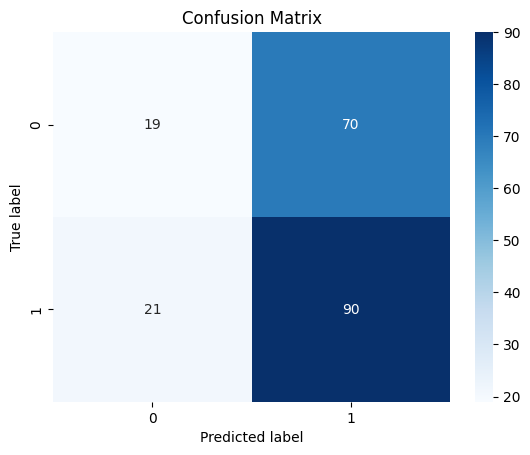

In [24]:
# plot confusion matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_LR), annot=True, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label', title="Confusion Matrix")
print(classification_report(y_test, y_pred_LR))

# modelaccuracy score: f1-score and jaccard score
F1_LR = f1_score(y_test, y_pred_LR, average='weighted').round(2)
J_LR = jaccard_score(y_test, y_pred_LR).round(2)

# print model accuracy scores
print('f1 score:', F1_LR)
print('jaccard score:', J_LR,'\n')

### **Importance of Each Feature in the Logistic Regression Model**

Age                        0.025429
Income                     0.003828
Num_Purchases              0.016940
Average_Rating             0.068178
Customer_Service_Rating    0.004194
Membership_Duration        0.004233
dtype: float64 



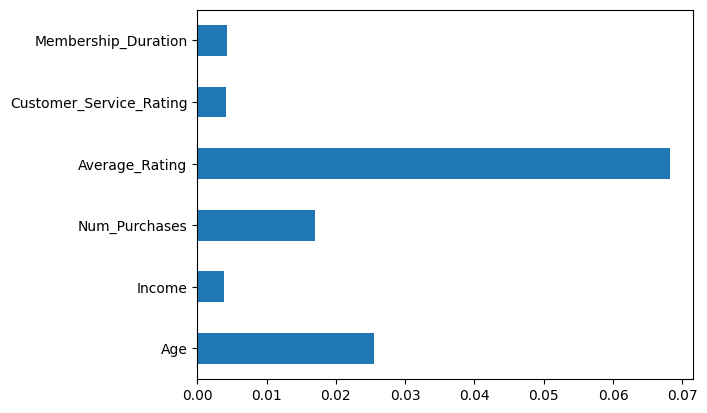

In [25]:
# display the importance of each feature

importances = abs(pd.Series(best_LR.coef_[0], index=X_train.columns))
importances.plot(kind='barh')
print(importances,'\n')

### **SUPPORT VECTOR MACHINE (SVM)**

In [26]:
# import support vector machine package 
from sklearn import svm
SVM = svm.SVC()

### **SVM Hyperparameters Tuning With GridSearch**

In [27]:
# define hyparameters for SVM

hyperparameters = {'kernel': ['linear', 'poly', 'rbf'],
                  'C': [0.01, 0.1, 1.0],
                  'gamma': [0.01,0.1,1.0]
                  }
GS_SVM = GridSearchCV(SVM, hyperparameters, cv=5)

In [28]:
# fitting the data
GS_SVM.fit(scaled_X_train, y_train)

# display best hyparameters for support vector machine
best_SVM = GS_SVM.best_estimator_
print(best_SVM, '\n') 

# predicting the test data with the best hyperparameters
y_pred_SVM = best_SVM.predict(scaled_X_test)

print('Predicted y values:   ', y_pred_SVM[0:20])
print('Actual y test values: ', y_test[0:20].values)

SVC(C=0.01, gamma=0.01, kernel='linear') 

Predicted y values:    [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Actual y test values:  [1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0]


### **SVM Model Accuracy Evaluation**

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.56      1.00      0.71       111

    accuracy                           0.56       200
   macro avg       0.28      0.50      0.36       200
weighted avg       0.31      0.56      0.40       200

f1 score: 0.4
jaccard score: 0.56 



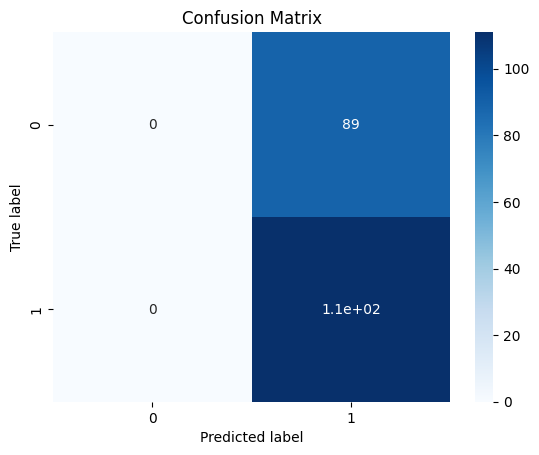

In [29]:
# plot confusion matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_SVM), annot=True, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label', title="Confusion Matrix")
print(classification_report(y_test, y_pred_SVM))

# modelaccuracy score: f1-score and jaccard score
F1_SVM = f1_score(y_test, y_pred_SVM, average='weighted').round(2)
J_SVM = jaccard_score(y_test, y_pred_SVM).round(2)

# print model accuracy scores
print('f1 score:', F1_SVM)
print('jaccard score:', J_SVM,'\n')

### **Importance of Each Feature in the Logistic Regression Model**

Age                        0.000224
Income                     0.000134
Num_Purchases              0.000296
Average_Rating             0.070000
Customer_Service_Rating    0.000063
Membership_Duration        0.000169
dtype: float64 



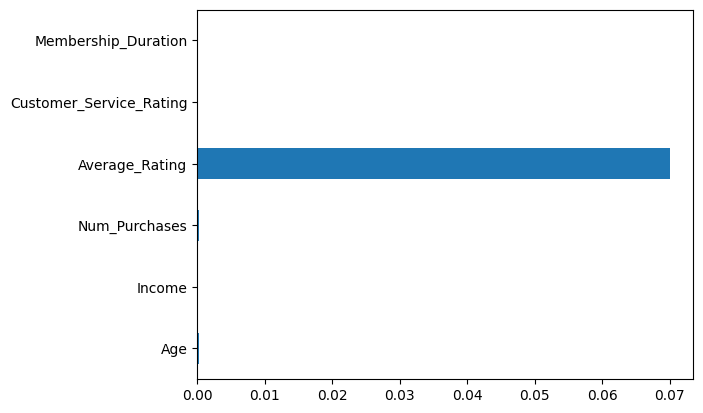

In [30]:
# display the importance of each feature

importances = abs(pd.Series(best_SVM.coef_[0], index=X_train.columns))
importances.plot(kind='barh')
print(importances,'\n')

### **K-NEAREST NEIGHBOUR (KNN)**

In [31]:
# import K-Nearest Neigbour package 
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

### **KNN Hyperparameters Tuning With GridSearch**

In [32]:
# define hyparameters for KNN

hyperparameters = {'n_neighbors': list(range(1,10,2)),
                  'weights': ['uniform', 'distance']
                  }
GS_KNN = GridSearchCV(KNN, hyperparameters, cv=5)

In [33]:
# fitting the data
GS_KNN.fit(scaled_X_train, y_train)

# display best hyparameters for KNN
best_KNN = GS_KNN.best_estimator_
print(best_KNN, '\n') 

# predicting the test data with the best hyperparameters
y_pred_KNN = best_KNN.predict(scaled_X_test)

print('Predicted y values:   ', y_pred_KNN[0:20])
print('Actual y test values: ', y_test[0:20].values)

KNeighborsClassifier(n_neighbors=3, weights='distance') 

Predicted y values:    [1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0]
Actual y test values:  [1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0]


              precision    recall  f1-score   support

           0       0.47      0.54      0.50        89
           1       0.58      0.50      0.54       111

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.53      0.52      0.52       200

f1 score: 0.52
jaccard score: 0.37 



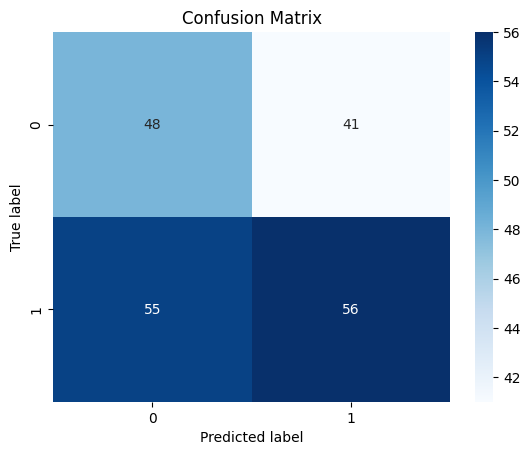

In [34]:
# plot confusion matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_KNN), annot=True, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label', title="Confusion Matrix")
print(classification_report(y_test, y_pred_KNN))

# modelaccuracy score: f1-score and jaccard score
F1_KNN = f1_score(y_test, y_pred_KNN, average='weighted').round(2)
J_KNN = jaccard_score(y_test, y_pred_KNN).round(2)

# print model accuracy scores
print('f1 score:', F1_KNN)
print('jaccard score:', J_KNN,'\n')

### **RANDOM FOREST**

In [35]:
# import support random forest classifier package 
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

### **Random Forest Hyperparameters Tuning With GridSearch**

In [36]:
# define hyparameters for random forest classifier

hyperparameters = {'n_estimators': list(range(50,100,10)),
                   'criterion': ['gini', 'entropy'],
                   'max_depth': list(range(10,20,1))
                  }
GS_RF = GridSearchCV(RF, hyperparameters, cv=5)

In [37]:
# fitting the data
GS_RF.fit(scaled_X_train, y_train)

# display best hyparameters for random forest classifier
best_RF = GS_RF.best_estimator_
print(best_RF, '\n') 

# predicting the test data with the best hyperparameters
y_pred_RF = best_RF.predict(scaled_X_test)

print('Predicted y values:   ', y_pred_RF[0:20])
print('Actual y test values: ', y_test[0:20].values)

RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=60) 

Predicted y values:    [1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0]
Actual y test values:  [1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0]


### **Random Forest Classifier Accuracy Evaluation**

              precision    recall  f1-score   support

           0       0.46      0.52      0.49        89
           1       0.57      0.52      0.55       111

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.53      0.52      0.52       200

f1 score: 0.52
jaccard score: 0.38 



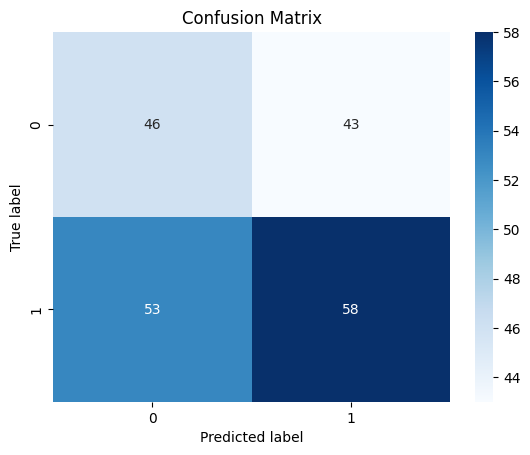

In [38]:
# plot confusion matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label', title="Confusion Matrix")
print(classification_report(y_test, y_pred_RF))

# modelaccuracy score: f1-score and jaccard score
F1_RF = f1_score(y_test, y_pred_RF, average='weighted').round(2)
J_RF = jaccard_score(y_test, y_pred_RF).round(2)

# print model accuracy scores
print('f1 score:', F1_RF)
print('jaccard score:', J_RF,'\n')

### **Importance of Each Feature in the Random Forest Classifier**

Age                        0.214518
Income                     0.292100
Num_Purchases              0.177643
Average_Rating             0.090256
Customer_Service_Rating    0.093042
Membership_Duration        0.132441
dtype: float64 



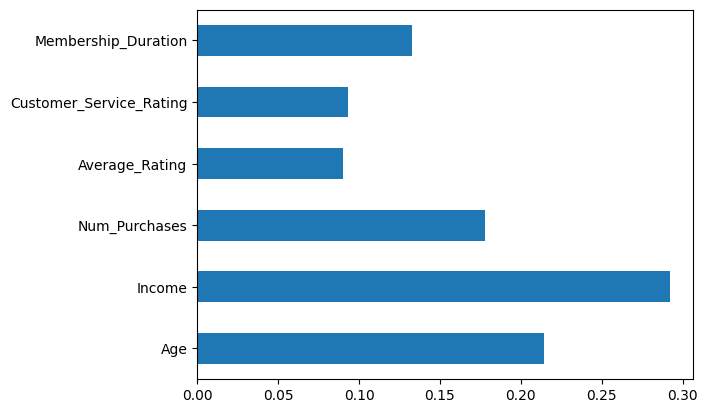

In [39]:
# display the importance of each feature

importances = abs(pd.Series(best_RF.feature_importances_, index=X_train.columns))
importances.plot(kind='barh')
print(importances,'\n')

### **ARTIFICAL NEURAL NETWORK(ANN)**

In [40]:
# install sckikeras library
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
# import ANN algorithm package
import scikeras as sk
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [42]:
# define ANN model architecture
def create_ANN():
    ANN = Sequential()
    ANN.add(Dense(32, activation='relu', input_dim=scaled_X_train.shape[1]))
    ANN.add(Dense(16, activation='relu'))
    ANN.add(Dense(1, activation='sigmoid'))
    ANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return ANN

# create the model
ANN = KerasClassifier(model=create_ANN, verbose=0)
#print(ANN)

### **ANN Hyperparameters Tuning With GridSearch**

In [43]:
# define hyparameters for ANN

hyperparameters = {'batch_size': [32, 64],
                   'epochs': [50, 100],
                   'optimizer': ['adam', 'sgd']
                  }
GS_ANN = GridSearchCV(ANN, hyperparameters, cv=5, n_jobs=-1)

In [44]:
# fitting the data
GS_ANN.fit(scaled_X_train, y_train)

# print the best hyperparameters
print(GS_ANN.best_params_) 
best_ANN = GS_ANN.best_estimator_ 

# predicting the test data with the best hyperparameters
y_pred_ANN = best_ANN.predict(scaled_X_test)

print('Predicted y values:   ', y_pred_ANN[0:5].round(2))
print('Actual y test values: ', y_test[0:5].values)

{'batch_size': 32, 'epochs': 100, 'optimizer': 'adam'}
Predicted y values:    [1 1 1 0 1]
Actual y test values:  [1 1 1 0 1]


### **ANN Model Accuracy Evaluation**

              precision    recall  f1-score   support

           0       0.51      0.54      0.52        89
           1       0.61      0.59      0.60       111

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.57      0.56      0.57       200

f1 score: 0.57
jaccard score: 0.43 



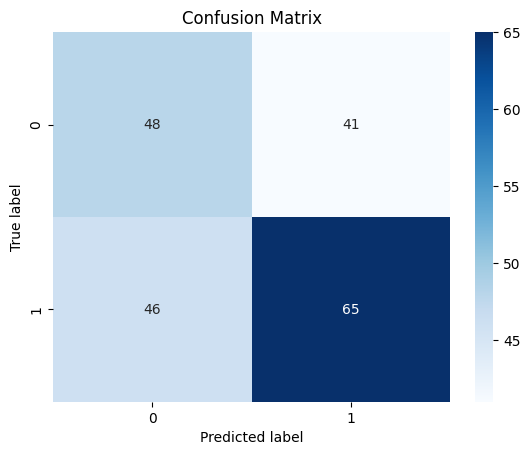

In [45]:
# plot confusion matrix
ax=sns.heatmap(confusion_matrix(y_test, y_pred_ANN), annot=True, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label', title="Confusion Matrix")
print(classification_report(y_test, y_pred_ANN))

# modelaccuracy score: f1-score and jaccard score
F1_ANN = f1_score(y_test, y_pred_ANN, average='weighted').round(2)
J_ANN = jaccard_score(y_test, y_pred_ANN).round(2)

# print model accuracy scores
print('f1 score:', F1_ANN)
print('jaccard score:', J_ANN,'\n')

### **Importance of Each Feature in the Artificial Neural Network Model**

Age: 1
Income: 1
Num_Purchases: 1
Customer_Service_Rating: 1
Membership_Duration: 1
Average_Rating: 0


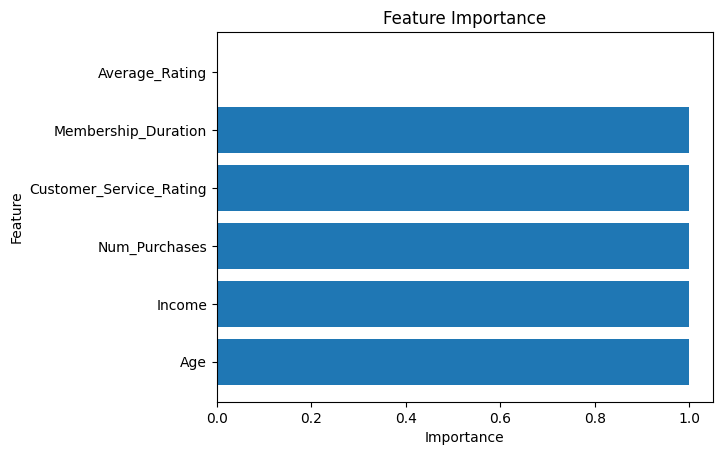

In [46]:
# display the importance of each feature

importance = y_pred_ANN
importance = np.squeeze(importance)
feature_names = X_train.columns
feature_importance = dict(zip(feature_names, importance))
sorted_importance = sorted(feature_importance.items(), key=lambda kv: abs(kv[1]), reverse=True)

for feature, importance in sorted_importance:
    print(f"{feature}: {abs(importance)}")

importance_values = [abs(kv[1]) for kv in sorted_importance]
#print(importance_values)
feature_names = [kv[0] for kv in sorted_importance]
#print(feature_names)

plt.barh(range(len(importance_values)), importance_values, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

## **MODELS ACCURACY REPORT**

In [47]:
# Models accuracy report

metrics = [['Logistic Regression', F1_LR, J_LR], 
           ['Support Vector Machine', F1_SVM, J_SVM], 
           ['K-Nearest Neigbour', F1_KNN,J_KNN],
           ['Random Forest', F1_RF, J_RF],
           ['Artificial Neural Network', F1_ANN, J_ANN]]

metrics_df = pd.DataFrame(metrics, columns = ['Algorithm','F1-score','Jaccard']).round(2)
metrics_df.set_index('Algorithm', inplace =  True)
metrics_df.sort_values('F1-score', ascending=False, inplace=True)

metrics_df

,F1-score,Jaccard
Algorithm,,
Artificial Neural Network,0.57,0.43
K-Nearest Neigbour,0.52,0.37
Random Forest,0.52,0.38
Logistic Regression,0.50,0.50
Support Vector Machine,0.40,0.56
